<a href="https://colab.research.google.com/github/Carolinsrainbow/UC_MineriaDeDatosConR/blob/main/MDD_Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resumen
¡Bienvenido(a)!
Te invitamos a realizar la siguiente tarea sobre la clasificación no supervisada Kmedias.
Objetivo: Utilizar el método de Kmedias en un problema de negocios.
Tipo de actividad:  Grupal
Tipo de evaluación: Sumativa (con calificación)
Ponderación: 13,4%
Puntaje: 50 puntos
Calificación: Exigencia de 50%

In [ ]:
# instalación de librerías en R
# -------------------------------------------------------

install.packages("ISLR")
install.packages("readxl")
install.packages("dplyr")
install.packages("tibble")
install.packages("ggplot2")
install.packages("plotly")
install.packages("skimr")
install.packages("factoextra")
install.packages("tidyverse")

# -------------------------------------------------------
# librerías
# -------------------------------------------------------

library(ISLR)
library(readxl)
library(dplyr)
library(tibble)
library(ggplot2)
library(plotly)
library(factoextra)
library(skimr)
library(tidyverse)

# -------------------------------------------------------


A. Cárgalo con el nombre “analisis_vinos”, renombrando las variables quitando los espacios según corresponda, por ejemplo “fixed acidity” renombrada por “fixedacidity”.

In [27]:
analisis_vinos  <- read.csv("analisis_vinos.csv",sep=";")
names(analisis_vinos) <- gsub("[ .]", "", names(analisis_vinos))
print(names(analisis_vinos))

 [1] "fixedacidity"       "volatileacidity"    "citricacid"        
 [4] "residualsugar"      "chlorides"          "freesulfurdioxide" 
 [7] "totalsulfurdioxide" "density"            "pH"                
[10] "sulphates"          "alcohol"            "quality"           
[13] "class"             


b. Entrega una estadística descriptiva de todas las variables incluidas en el set de datos.

In [28]:
skim(analisis_vinos)

── Data Summary ────────────────────────
                           Values        
Name                       analisis_vinos
Number of rows             1599          
Number of columns          13            
_______________________                  
Column type frequency:                   
  character                1             
  numeric                  12            
________________________                 
Group variables            None          

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 class                 0             1   3   7     0        3          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable      n_missing complete_rate    mean       sd    p0    p25
 1 fixedacidity               0             1  8.32    1.74    4.6    7.1  
 2 volatileacidity            0             1  0.528   0.179   0.12   0.39 

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 17' in coercion to 'logical(1)'


c. Imagina que se desea realizar una segmentación de los vinos utilizando las variables físico-químicas “alcohol”, “volatile acidity”, “sulphates” y “citric acid” en su versión estandarizada. Utilizando Distancia Euclidiana y sin realizar análisis de datos fuera de lugar, ¿en cuántos grupos clasificarías los vinos? Justifica tu respuesta con un análisis gráfico.

In [29]:
vinos.centrados <- scale(select(analisis_vinos,
                                alcohol,
                                volatileacidity,
                                sulphates,
                                citricacid),
                         center = TRUE, scale = TRUE)

mat_dist <- dist(x = vinos.centrados[1:100,], method = "euclidean")
max(mat_dist)


[1] 9.606919

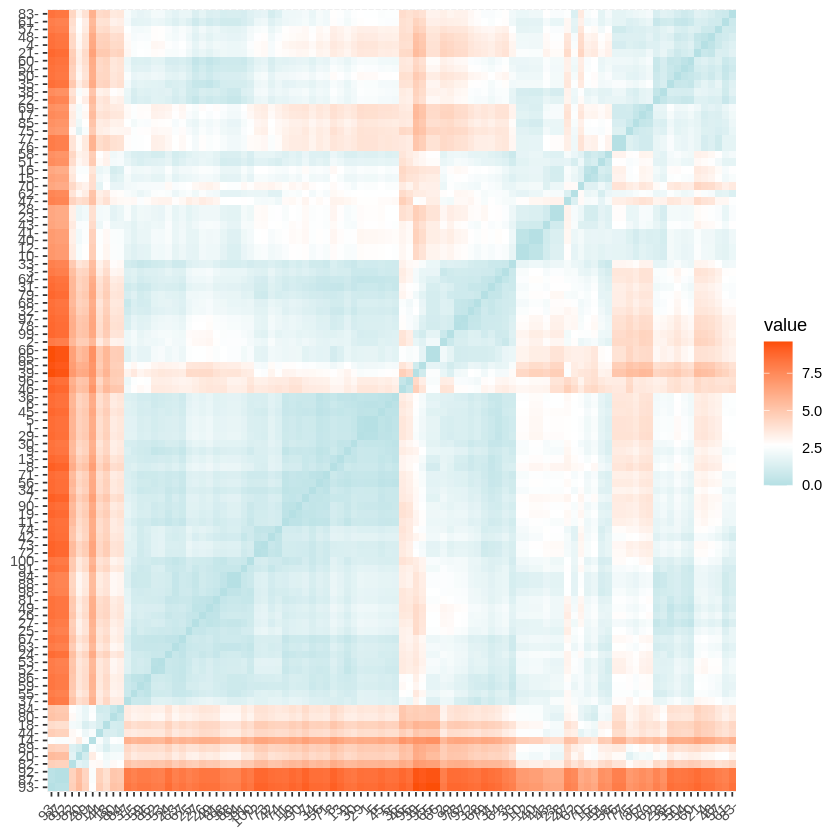

In [30]:
fviz_dist(mat_dist, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

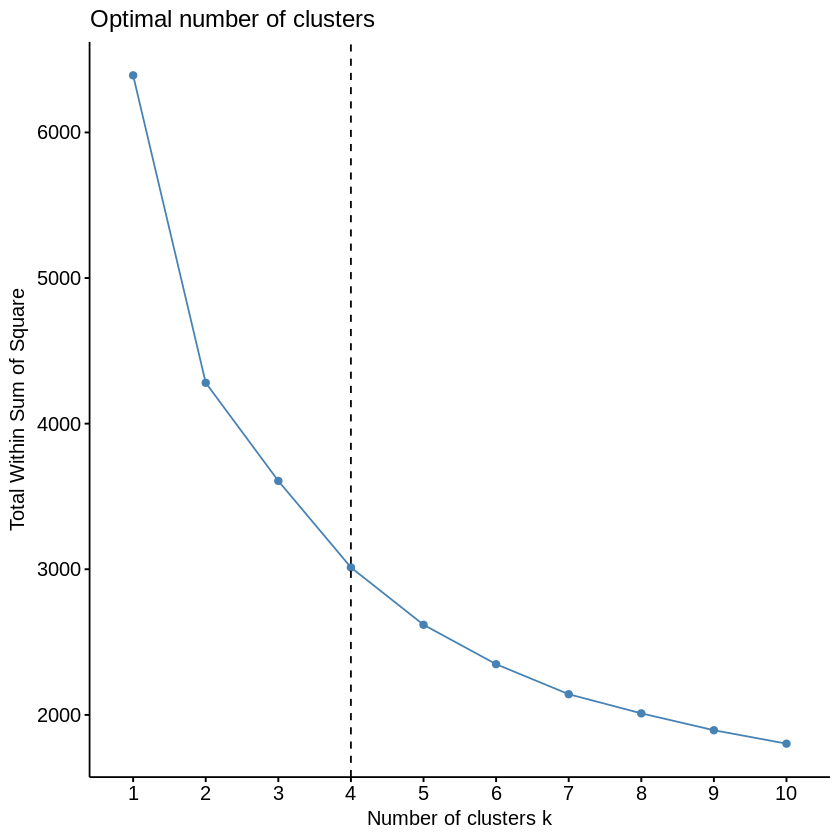

In [31]:
fviz_nbclust(vinos.centrados, kmeans, method = "wss", nstart = 25) +
  geom_vline(xintercept = 4, linetype = 2)  # Añadir una línea vertical como guía si es necesario

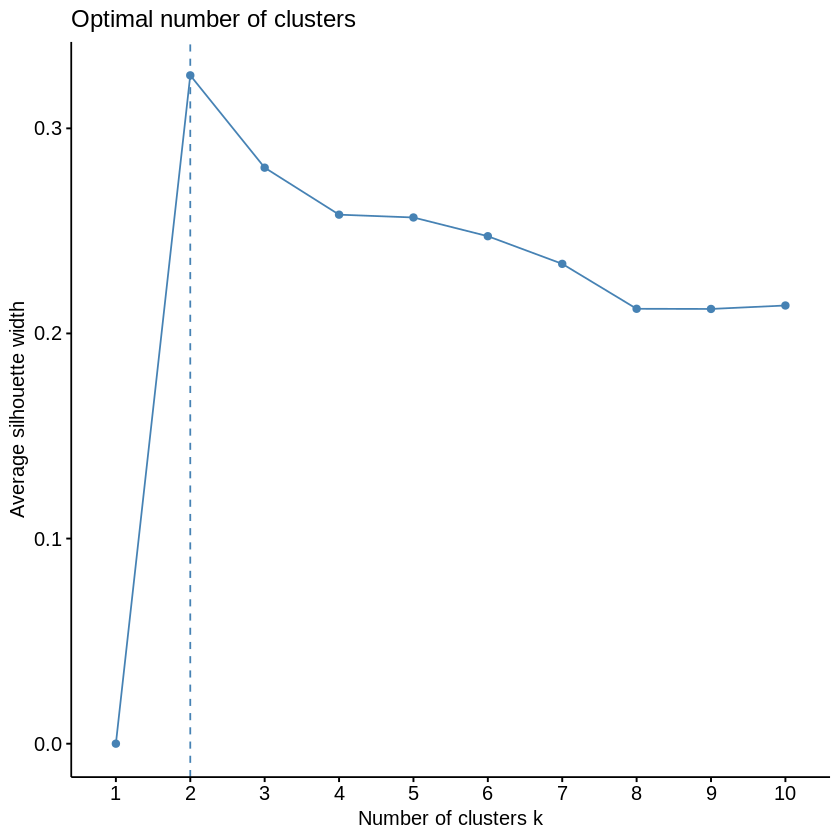

In [32]:
fviz_nbclust(vinos.centrados, kmeans, method = "silhouette", nstart = 25)


d. Imagina que se desea clasificar los vinos en 3 grupos (independiente de la respuesta entregada en el punto 3) según las variables utilizadas en el punto anterior. Utiliza el algoritmo de k-medias para clasificar los vinos en 3 grupos. Considera una repetición de 100 veces del algoritmo de k-medias y la semilla 12345 para la generación de números aleatorios.
Reporta los centros y la suma de cuadrados SCR de cada uno de los 3 grupos. Realiza un gráfico de segmentos y la distribución de los clústers.

[1] "Centros de los clusters:"
     alcohol volatileacidity  sulphates citricacid
1 -0.6059523      -0.5653064  0.4769004  0.7383230
2  1.2820977      -0.7713241  0.3101303  0.7056183
3 -0.2691370       0.7108803 -0.4331882 -0.7808987
[1] "Suma de cuadrados dentro de los clusters (SCR):"
[1] 3606.786


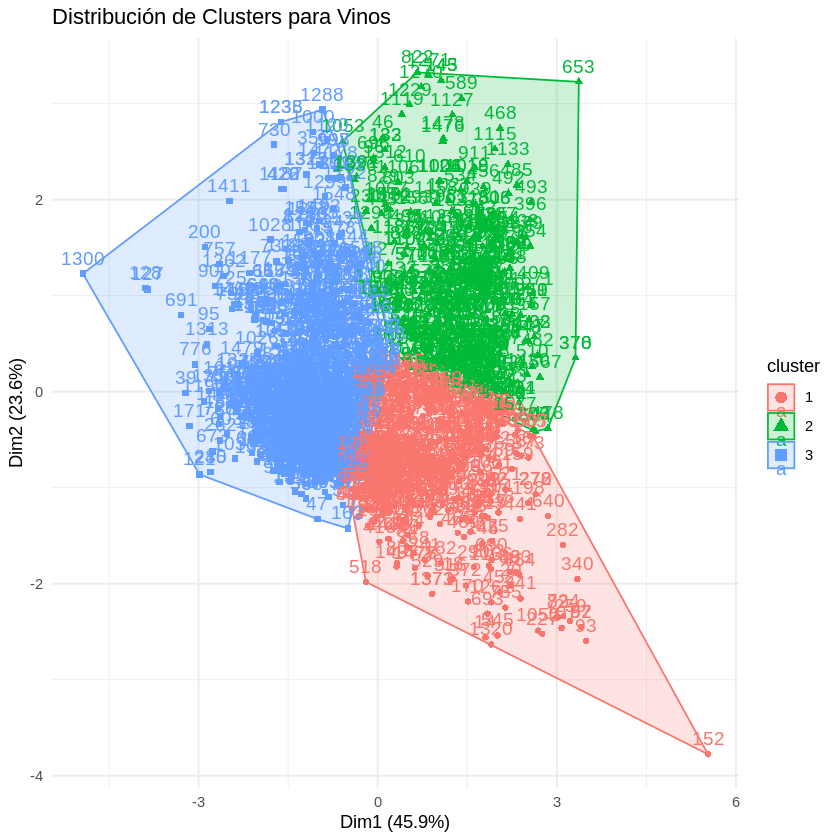

In [33]:
set.seed(12345)
kmeans_result <- kmeans(vinos.centrados, centers = 3, nstart = 100)

centros <- kmeans_result$centers
scr <- kmeans_result$tot.withinss

print("Centros de los clusters:")
print(centros)

print("Suma de cuadrados dentro de los clusters (SCR):")
print(scr)

fviz_cluster(kmeans_result, data = vinos.centrados) +
  ggtitle("Distribución de Clusters para Vinos") +
  theme_minimal()


  Cluster Frecuencia FrecRelativa.clusters FrecRelativa.Freq FrecAcumulada
1       1        454                     1         0.2839275     0.2839275
2       2        376                     2         0.2351470     0.5190744
3       3        769                     3         0.4809256     1.0000000


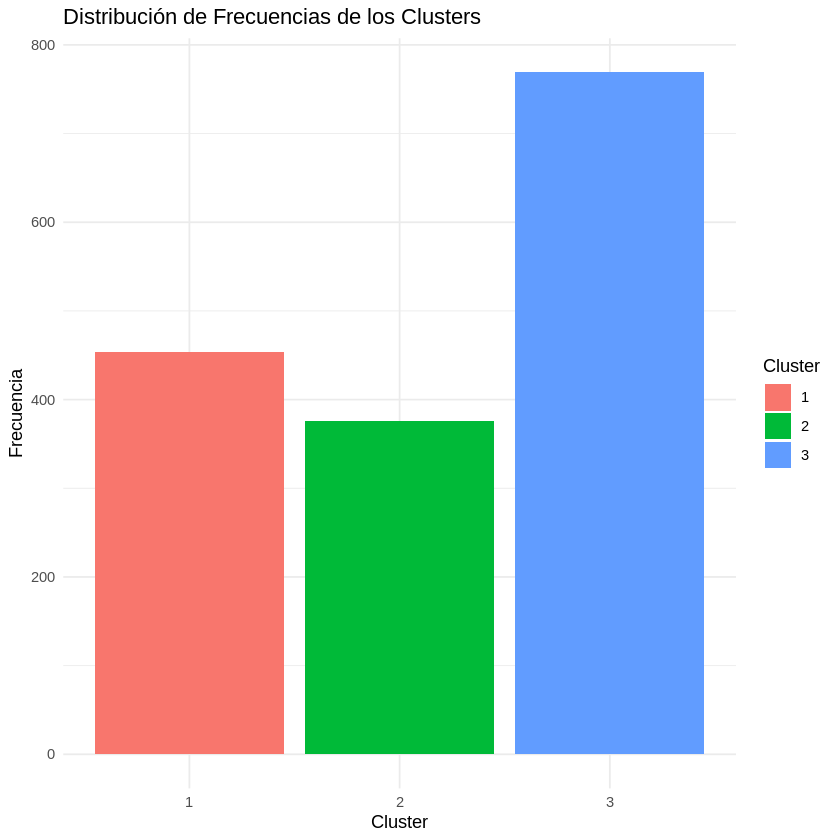

In [36]:

clusters <- kmeans_result$cluster
frecuencias <- table(clusters)
frec_rel <- prop.table(frecuencias)
frec_acum <- cumsum(frec_rel)

df_frecuencias <- data.frame(Cluster = names(frecuencias),
                             Frecuencia = as.numeric(frecuencias),
                             FrecRelativa = frec_rel,
                             FrecAcumulada = frec_acum)

print(df_frecuencias)

ggplot(df_frecuencias, aes(x = Cluster, y = Frecuencia, fill = Cluster)) +
  geom_bar(stat = "identity") +
  labs(title = "Distribución de Frecuencias de los Clusters",
       x = "Cluster",
       y = "Frecuencia") +
  theme_minimal()



e. Agrega la columna “cluster” al dataframe inicial “analisis_vinos” con el segmento al que pertenece cada vino. Para cada categoría de “cluster”, entrega una estadística descriptiva de las variables utilizadas en la segmentación (sin estandarizar): “alcohol”, “volatile acidity”, “sulphates” y “citric acid”, además de analizar la variable “class” para cada uno de los grupos. Comenta tus resultados.